In [22]:
# Importing library
# Adding Preliminary Libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
#Importing Dataset

seed = pd.read_csv('Seed_Data.csv')
seed


A      P       C     LK     WK  A_Coef    LKG  target
0    15.26  14.84  0.8710  5.763  3.312   2.221  5.220       0
1    14.88  14.57  0.8811  5.554  3.333   1.018  4.956       0
2    14.29  14.09  0.9050  5.291  3.337   2.699  4.825       0
3    13.84  13.94  0.8955  5.324  3.379   2.259  4.805       0
4    16.14  14.99  0.9034  5.658  3.562   1.355  5.175       0
..     ...    ...     ...    ...    ...     ...    ...     ...
205  12.19  13.20  0.8783  5.137  2.981   3.631  4.870       2
206  11.23  12.88  0.8511  5.140  2.795   4.325  5.003       2
207  13.20  13.66  0.8883  5.236  3.232   8.315  5.056       2
208  11.84  13.21  0.8521  5.175  2.836   3.598  5.044       2
209  12.30  13.34  0.8684  5.243  2.974   5.637  5.063       2

[210 rows x 8 columns]

In [24]:
#Preparing Data
Y = seed['target']          # Split off classifications
X = seed.iloc[:, [0, 1, 2, 3, 4, 5, 6]].values # Split off features


In [25]:
# Now we will separate the target variable from the original dataset and again convert it to an array by using numpy.
Y = seed['target']
Y = np.array(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

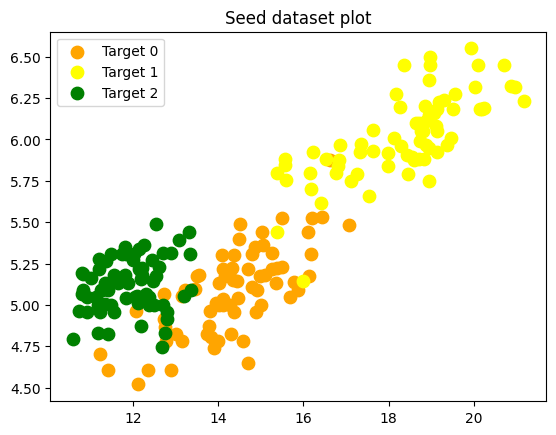

In [26]:
# Seed dataset clustering plot
# Visualise Classes
# seed dataset has three classes in target


plt.scatter(X[Y == 0, 0], X[Y == 0, 6], s =80, c = 'orange', label = 'Target 0')
plt.scatter(X[Y == 1, 0], X[Y == 1, 6], s =80,  c = 'yellow', label = 'Target 1')
plt.scatter(X[Y == 2, 0], X[Y == 2, 6], s =80,  c = 'green', label = 'Target 2')
plt.title('Seed dataset plot')
plt.legend()


In [27]:
# Kmeans Clustering for Seed Dataset
from sklearn.cluster import KMeans

# Calculating WCSS (within-cluster sums of squares) 


wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# Running K-Means Model


cluster_Kmeans = KMeans(n_clusters=3)
model_kmeans = cluster_Kmeans.fit(X)
pred_kmeans = model_kmeans.labels_
pred_kmeans


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

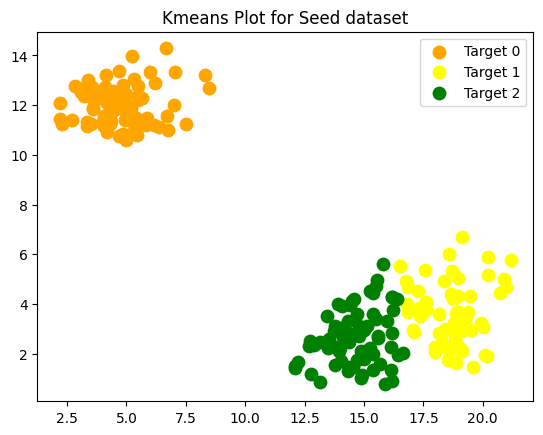

In [28]:
#Kmeans Clustering plot for Seed dataset
# Visualizing Output
# In the above output we got value labels: ‘0’, ‘1’  and ‘2’. For a better understanding, we can visualize these clusters.


plt.scatter(X[pred_kmeans == 0, 5], X[pred_kmeans == 0, 0], s = 80, c = 'orange', label = 'Target 0')
plt.scatter(X[pred_kmeans == 1, 0], X[pred_kmeans == 1, 5], s = 80, c = 'yellow', label = 'Target 1')
plt.scatter(X[pred_kmeans == 2, 0], X[pred_kmeans == 2, 5], s = 80, c = 'green', label = 'Target 2')


plt.title('Kmeans Plot for Seed dataset')


plt.legend()


In [29]:
# KNN accuracy


seed=pd.read_csv('Seed_Data.csv')

X=seed.iloc[:,:-1].values
y=seed.iloc[:,-1].values


In [30]:
# Splitting the dataset into the Training set and Test set


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [31]:
# Calculating Accuracy score, Confusion matrix, Classification report.


from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


X=seed.iloc[:,:-1].values
y=seed.iloc[:,-1].values

In [32]:
Xtrain, Xtest, y_train, y_test = train_test_split(X, y)
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)


knn = neighbors.KNeighborsClassifier(n_neighbors=14)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)


print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification report:')
print(classification_report(y_test, y_pred))

Accuracy score: 0.9056603773584906
Confusion matrix:
[[16  1  2]
 [ 1 18  0]
 [ 1  0 14]]
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.95      0.95      0.95        19
           2       0.88      0.93      0.90        15

    accuracy                           0.91        53
   macro avg       0.90      0.91      0.91        53
weighted avg       0.91      0.91      0.91        53



In [33]:
# Import Library for Hierarchical clustering


import matplotlib.pyplot as plt  
from sklearn.cluster import AgglomerativeClustering


In [34]:
# Plotting of Dendrogram


import scipy.cluster.hierarchy as sch



Text(0, 0.5, 'Euclidean distance in the space with other variables')

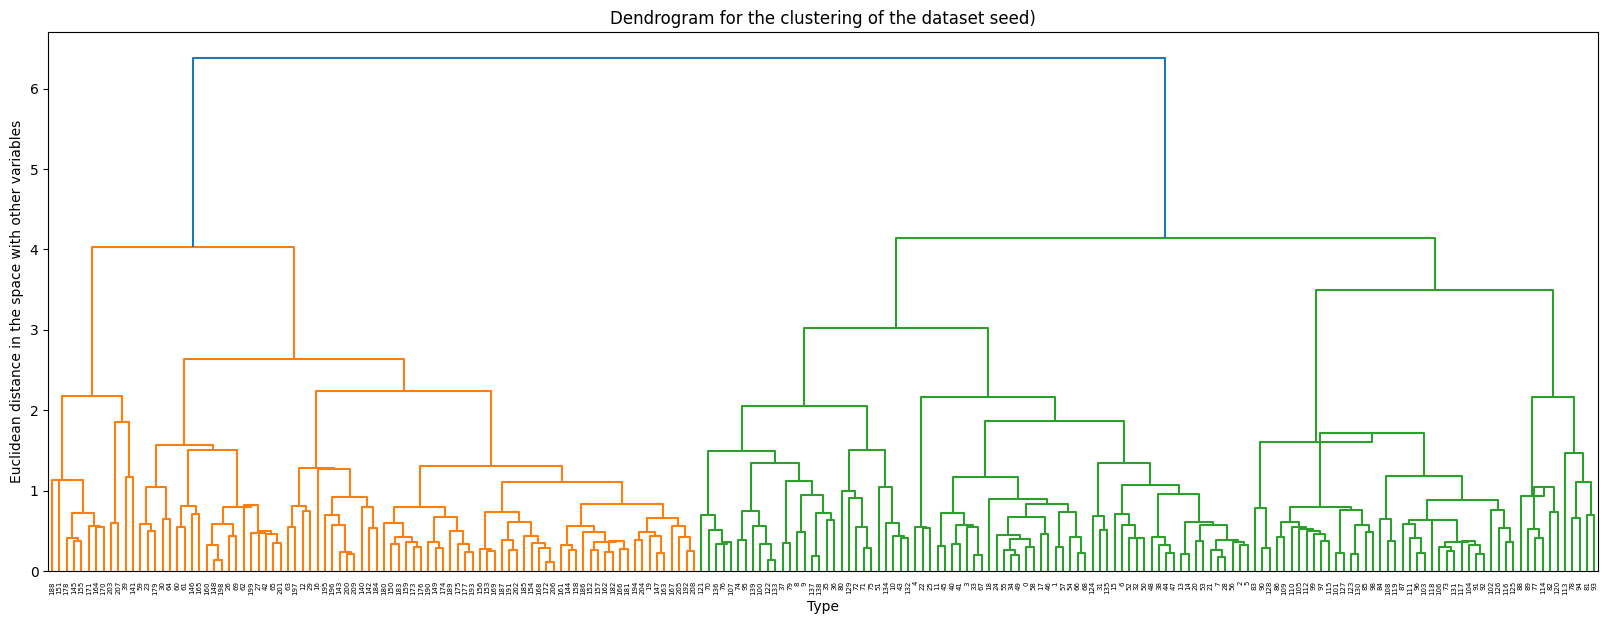

In [35]:
#Decide the number of clusters by using this dendrogram
Z = sch.linkage(X, method = 'median')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset seed)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

In [36]:
# Building an Agglomerative Clustering Model


#Initialise Model


cluster_H = AgglomerativeClustering(n_clusters=3)


In [37]:
# Modelling the data
model_clt = cluster_H.fit(X)
model_clt
pred1 = model_clt.labels_
pred1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

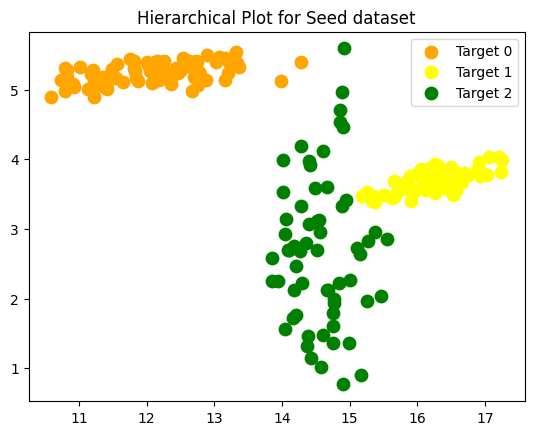

In [38]:
# Plotting the HCA Cluster


plt.scatter(X[pred1 == 0, 0], X[pred1 == 0, 3], s = 80, c = 'orange', label = 'Target 0')
plt.scatter(X[pred1 == 1, 1], X[pred1 == 1, 4], s = 80, c = 'yellow', label = 'Target 1')
plt.scatter(X[pred1 == 2, 1], X[pred1 == 2, 5], s = 80, c = 'green', label = 'Target 2')
plt.title('Hierarchical Plot for Seed dataset')
plt.legend()


In [39]:
#Hierarchical clustering Accuracy for Seed dataset
import sklearn.metrics as sm


target = pd.DataFrame(seed.target)
#based on the dendrogram we have two clusetes 
k =3 
#build the model
HClustering = AgglomerativeClustering(n_clusters=k , affinity="euclidean",linkage="ward")
#fit the model on the dataset
HClustering.fit(X)
#accuracy of the model
sm.accuracy_score(target,HClustering.labels_)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.3761904761904762